In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [3]:
df.columns = ['month', 'diet', 'gym', 'finance',]    #rename columns
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [4]:
df.dtypes

month      object
diet        int64
gym         int64
finance     int64
dtype: object

In [5]:
df.month = pd.to_datetime(df.month)    #set object to datetime object
df.set_index('month', inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


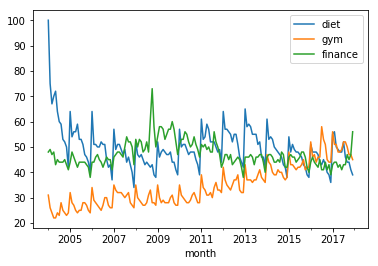

In [6]:
df.plot()

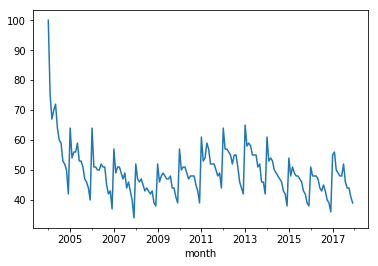

In [7]:
df['diet'].plot()    #people be slimming for the new year

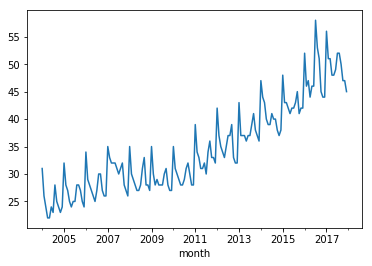

In [8]:
df['gym'].plot()    #people be getting fitter

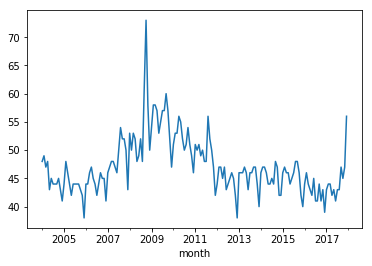

In [9]:
df['finance'].plot()    #recession in 2008

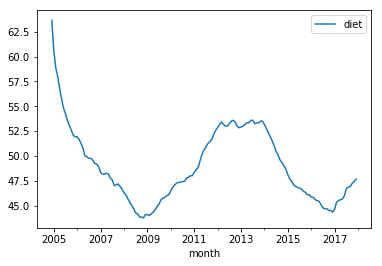

In [10]:
diet = df[['diet']]
diet.rolling(12).mean().plot()

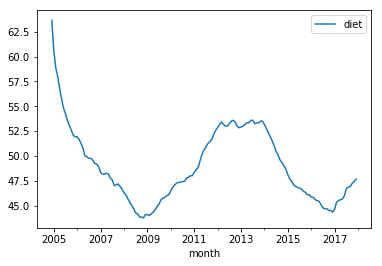

In [11]:
gym = df[['gym']]
diet.rolling(12).mean().plot()

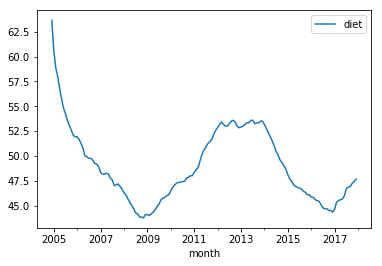

In [12]:
finance = df[['finance']]
diet.rolling(12).mean().plot()

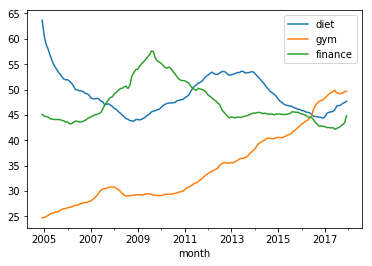

In [13]:
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean(), finance.rolling(12).mean()], axis=1).plot()

## Seasonal Patterns 

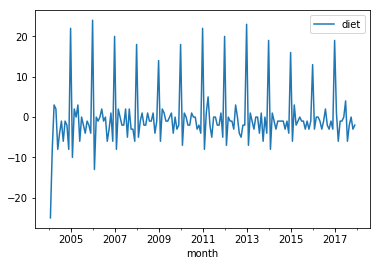

In [14]:
diet.diff().plot()

In [15]:
gym = df[['gym']]

In [16]:
set(gym.index.year)

{2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017}

In [17]:
train = gym[gym.index.year < 2016]
test = gym[gym.index.year == 2016]

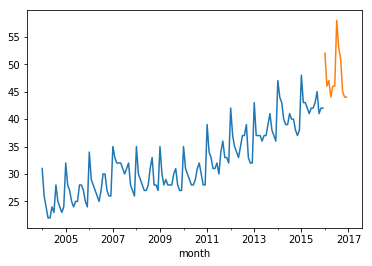

In [18]:
train['gym'].plot()
test['gym'].plot()

##  Method 1 - Naive Approach

In [19]:
dd = np.asarray(train.gym)    #Tomorrow's value will be the same as today
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]

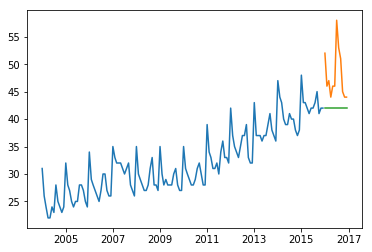

In [20]:
plt.plot(train.index, train['gym'], label='Train')
plt.plot(test.index, test['gym'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')

In [21]:
rms = sqrt(mean_squared_error(test.gym, y_hat.naive))     #Root Mean Squared Error
print(rms)

7.371114795831994


##  Method 2 - Simple Approach

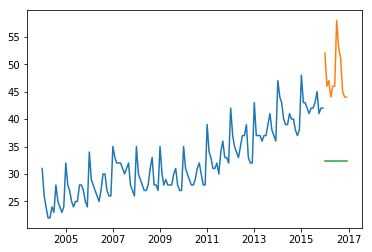

In [22]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['gym'].mean()     #Just the average used to predict
plt.plot(train['gym'], label='Train')
plt.plot(test['gym'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple')

In [23]:
rms = sqrt(mean_squared_error(test.gym, y_hat_avg['avg_forecast']))     #Root Mean Squared Error
print(rms)    #Quite bad, worse than naive

16.241236953439774


##  Method 3 - Moving Average Approach

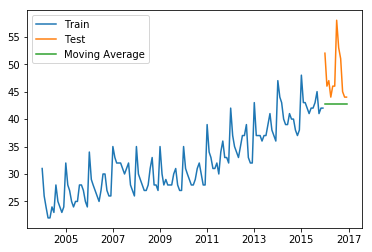

In [24]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['gym'].rolling(12).mean().iloc[-1]
plt.plot(train['gym'], label='Train')
plt.plot(test['gym'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average')
plt.legend(loc='best')

In [25]:
rms = sqrt(mean_squared_error(test.gym, y_hat_avg['moving_avg_forecast']))     #Root Mean Squared Error
print(rms)    #Best so far

6.710274046399131


##  Method 4 - Exponential Smoothing Approach

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,span=1,adjust=True).mean()
  


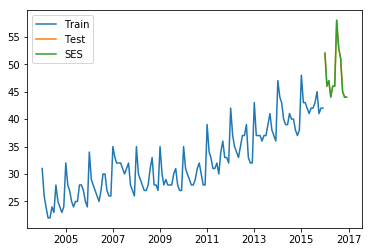

In [26]:
y_hat_avg = test.copy()    #Giving a weight to more recent values
y_hat_avg['SES'] = pd.ewma(test, span=5)['gym']    #Exponentially-weighted moving average
plt.plot(train['gym'], label='Train')
plt.plot(test['gym'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')

In [27]:
rms = sqrt(mean_squared_error(test.gym, y_hat_avg['SES']))     #Root Mean Squared Error
print(rms)    #Best so far

0.0
